# Random Forests

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('../week_01/all_penguins_clean.csv', index_col=0)
df.dropna(inplace=True)
df.shape

(334, 14)

In [3]:
X = df[['Culmen Length (mm)', 'Culmen Depth (mm)']]
y = df['Species']

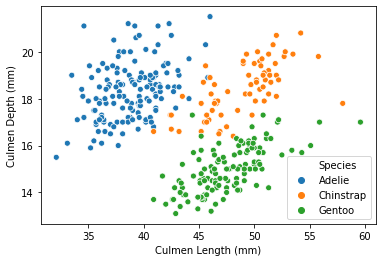

In [4]:
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=y)

In [9]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

In [16]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.5, random_state=42)

In [17]:
Xtrain.shape, Xtest.shape

((167, 2), (167, 2))

In [18]:
ytrain.shape, ytest.shape

((167,), (167,))

In [31]:
m = DecisionTreeClassifier(max_depth=10)  # we allow that many questions
m.fit(Xtrain, ytrain)

DecisionTreeClassifier(max_depth=10)

In [32]:
f"Training Accuracy: {round(m.score(Xtrain, ytrain), 3)}"

'Training Accuracy: 1.0'

In [33]:
f"Test Accuracy: {round(m.score(Xtest, ytest), 3)}"

'Test Accuracy: 0.922'

### Is your model Overfitting?

* training_accuracy > test_accuracy --> OVERFITTING, BAD
* training_accuracy ~= test_accuracy --> GOOD
* training_acccuray ~= test_accuracy, but both are low --> UNDERFITTING, BAD

In [39]:
# 1. create a copy of the training data
df2 = Xtrain.copy()
df2['y'] = ytrain
df2.head(3)

,Culmen Length (mm),Culmen Depth (mm),y
studyName,,,
PAL0708,46.0,18.9,Chinstrap
PAL0708,49.2,15.2,Gentoo
PAL0708,40.3,18.0,Adelie


### Model Ensemble

* many models working together to get a better prediction
* forest = many trees
* all the models need to be slightly different
* random = every tree uses different data points

In [74]:
trees = []

for i in range(10):   # we train 10 trees
    # select 50 penguins randomly
    sample = df2.sample(50)
    Xsample = sample[['Culmen Length (mm)', 'Culmen Depth (mm)']]
    ysample = sample['y']

    m = DecisionTreeClassifier(max_depth=2)
    m.fit(Xsample, ysample)
    trees.append(m)
    print('test', round(m.score(Xtest, ytest), 3))

test 0.862
test 0.904
test 0.874
test 0.898
test 0.886
test 0.892
test 0.88
test 0.892
test 0.892
test 0.88


In [75]:
predictions = []

for t in trees:  # every tree makes a prediction
    ypred = t.predict(Xtest)
    predictions.append(ypred)

In [76]:
import pandas as pd

pdf = pd.DataFrame(predictions)
pdf.shape

(10, 167)

In [106]:
pdf

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,Adelie,Gentoo,Chinstrap,Chinstrap,Adelie,Gentoo,Gentoo,Chinstrap,Chinstrap,Chinstrap,...,Adelie,Chinstrap,Chinstrap,Adelie,Gentoo,Gentoo,Gentoo,Chinstrap,Gentoo,Gentoo
1,Adelie,Gentoo,Adelie,Chinstrap,Adelie,Gentoo,Gentoo,Chinstrap,Chinstrap,Chinstrap,...,Adelie,Chinstrap,Chinstrap,Adelie,Gentoo,Gentoo,Gentoo,Chinstrap,Gentoo,Gentoo
2,Adelie,Gentoo,Chinstrap,Chinstrap,Adelie,Gentoo,Gentoo,Chinstrap,Chinstrap,Chinstrap,...,Adelie,Chinstrap,Chinstrap,Adelie,Gentoo,Gentoo,Gentoo,Chinstrap,Gentoo,Gentoo
3,Adelie,Gentoo,Chinstrap,Chinstrap,Adelie,Gentoo,Gentoo,Chinstrap,Chinstrap,Chinstrap,...,Adelie,Chinstrap,Chinstrap,Adelie,Gentoo,Gentoo,Gentoo,Chinstrap,Gentoo,Gentoo
4,Adelie,Gentoo,Adelie,Chinstrap,Adelie,Gentoo,Gentoo,Chinstrap,Chinstrap,Chinstrap,...,Adelie,Adelie,Chinstrap,Adelie,Gentoo,Gentoo,Gentoo,Chinstrap,Gentoo,Gentoo
5,Adelie,Gentoo,Chinstrap,Chinstrap,Adelie,Gentoo,Gentoo,Chinstrap,Chinstrap,Chinstrap,...,Adelie,Chinstrap,Chinstrap,Adelie,Gentoo,Gentoo,Gentoo,Chinstrap,Gentoo,Gentoo
6,Adelie,Gentoo,Adelie,Chinstrap,Adelie,Gentoo,Gentoo,Chinstrap,Chinstrap,Chinstrap,...,Adelie,Chinstrap,Chinstrap,Adelie,Gentoo,Gentoo,Gentoo,Chinstrap,Gentoo,Gentoo
7,Adelie,Gentoo,Chinstrap,Chinstrap,Adelie,Gentoo,Gentoo,Chinstrap,Chinstrap,Chinstrap,...,Adelie,Chinstrap,Chinstrap,Adelie,Gentoo,Gentoo,Gentoo,Chinstrap,Gentoo,Gentoo
8,Adelie,Gentoo,Adelie,Gentoo,Adelie,Gentoo,Gentoo,Chinstrap,Chinstrap,Chinstrap,...,Adelie,Gentoo,Chinstrap,Adelie,Gentoo,Gentoo,Gentoo,Chinstrap,Gentoo,Gentoo
9,Adelie,Gentoo,Adelie,Chinstrap,Adelie,Gentoo,Gentoo,Chinstrap,Chinstrap,Chinstrap,...,Adelie,Chinstrap,Chinstrap,Adelie,Gentoo,Gentoo,Gentoo,Chinstrap,Gentoo,Gentoo


In [77]:
yfinal = pdf.mode().head(1).values[0]
len(yfinal)

167

In [78]:
from sklearn.metrics import accuracy_score

In [79]:
accuracy_score(yfinal, ytest)

0.9041916167664671

**note that accuracies for single trees were ~0.88**

## With Scikit

In [91]:
#yt = pd.factorize(ytest, sort=True)  # convert strings to numbers

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
del Xtrain['y']

In [104]:
m = RandomForestClassifier(n_estimators=1000, max_depth=2, random_state=42)
m.fit(Xtrain, ytrain)
m.score(Xtrain, ytrain)

0.9580838323353293

In [105]:
m.score(Xtest, ytest)

0.9101796407185628

# Pros and Cons

## Logistic Regression

* good for binary decisions
* multiple classes combining multiple models (one-vs-all, OvA)
* usually requires feature engineering
* transparent, explainable
* output is a probability
* super fast
* decision boundaries are linear

## Decision Tree

* overfits easily
* easy to plot, transparent
* dont need much feature engineering
* no probability
* nonlinear decision boundaries

## Random Forest

* black box model
* very powerful
* works with complex data
* dont need much feature engineering
* pseudo-probability
* super easy to use
* nonlinear decision boundaries